In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import seaborn as sns

In [2]:
#Getting data
walmart=pd.read_csv("walmartsales.csv")

In [3]:
#head of all dataset before merging
walmart.head()

,Unnamed: 0,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,0,1,05-02-2010,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1287,10,05-02-2010,2193048.75,54.34,2.962,NaN,NaN,NaN,NaN,NaN,126.442065,9.765,False,B,126512
2,5148,37,05-02-2010,536006.73,45.97,2.572,NaN,NaN,NaN,NaN,NaN,209.852966,8.554,False,C,39910
3,2288,17,05-02-2010,789036.02,23.11,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,6.548,False,B,93188
4,4147,30,05-02-2010,465108.52,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,C,42988


# 1.HANDLING MISSING VALUE 

In [4]:
#NULL VALUES
walmart.isnull().sum()

Unnamed: 0         0
Store              0
Date               0
Weekly_Sales      15
Temperature       28
Fuel_Price         4
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

<AxesSubplot:>

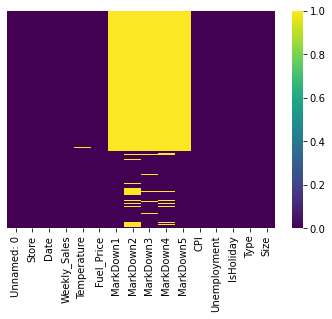

In [5]:
sns.heatmap(walmart.isnull(),yticklabels=False, cmap="viridis")

In [6]:
#These columns have large number of null values so we can drop these
walmart=walmart.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
walmart.head(10)

,Unnamed: 0,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,0,1,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1,1287,10,05-02-2010,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
2,5148,37,05-02-2010,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
3,2288,17,05-02-2010,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4,4147,30,05-02-2010,465108.52,39.05,2.572,210.752605,8.324,False,C,42988
5,3432,25,05-02-2010,677231.63,21.10,2.784,204.247194,8.187,False,B,128107
6,3003,22,05-02-2010,1033017.37,24.36,2.788,135.352461,8.283,False,B,119557
7,3146,23,05-02-2010,1364721.58,15.25,2.788,131.527903,5.892,False,B,114533
8,3289,24,05-02-2010,1388725.63,22.43,2.954,131.527903,8.326,False,A,203819
9,2574,19,05-02-2010,1507637.17,20.96,2.954,131.527903,8.350,False,A,203819


<AxesSubplot:>

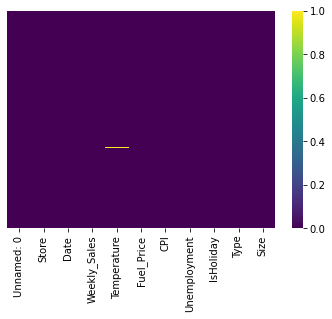

In [7]:
sns.heatmap(walmart.isnull(),yticklabels=False, cmap="viridis")

In [8]:
walmart.isnull().sum()

Unnamed: 0       0
Store            0
Date             0
Weekly_Sales    15
Temperature     28
Fuel_Price       4
CPI              0
Unemployment     0
IsHoliday        0
Type             0
Size             0
dtype: int64

In [9]:
#replacing missing values in weekly_sales by mean(avg)
mean_value=walmart['Weekly_Sales'].mean()

walmart['Weekly_Sales'].fillna(value=mean_value, inplace=True)
print("mean_value",mean_value)
print('Updated Dataframe:')
walmart

mean_value 1046810.8628286594
Updated Dataframe:


,Unnamed: 0,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,0,1,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1,1287,10,05-02-2010,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
2,5148,37,05-02-2010,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
3,2288,17,05-02-2010,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4,4147,30,05-02-2010,465108.52,39.05,2.572,210.752605,8.324,False,C,42988
...,...,...,...,...,...,...,...,...,...,...,...
6430,3574,25,26-10-2012,688940.94,56.69,3.882,216.151590,7.293,False,B,128107
6431,714,5,26-10-2012,319550.77,71.70,3.506,224.037814,5.422,False,B,34875
6432,5719,40,26-10-2012,921264.52,49.65,3.917,138.728161,4.145,False,A,155083
6433,2573,18,26-10-2012,1127516.25,56.09,3.917,138.728161,8.243,False,B,120653


In [10]:
walmart.isnull().sum()

Unnamed: 0       0
Store            0
Date             0
Weekly_Sales     0
Temperature     28
Fuel_Price       4
CPI              0
Unemployment     0
IsHoliday        0
Type             0
Size             0
dtype: int64

In [11]:
#replacing missing values in temperature by mode
walmart['Temperature'].fillna(walmart['Temperature'].mode()[0], inplace=True)
print(walmart['Temperature'].mode()[0])
walmart

50.43


,Unnamed: 0,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,0,1,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1,1287,10,05-02-2010,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
2,5148,37,05-02-2010,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
3,2288,17,05-02-2010,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4,4147,30,05-02-2010,465108.52,39.05,2.572,210.752605,8.324,False,C,42988
...,...,...,...,...,...,...,...,...,...,...,...
6430,3574,25,26-10-2012,688940.94,56.69,3.882,216.151590,7.293,False,B,128107
6431,714,5,26-10-2012,319550.77,71.70,3.506,224.037814,5.422,False,B,34875
6432,5719,40,26-10-2012,921264.52,49.65,3.917,138.728161,4.145,False,A,155083
6433,2573,18,26-10-2012,1127516.25,56.09,3.917,138.728161,8.243,False,B,120653


In [12]:
walmart.isnull().sum()

Unnamed: 0      0
Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      4
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [13]:
#replacing missing values in fuel_price by median
walmart['Fuel_Price'].fillna(walmart['Fuel_Price'].median(), inplace=True)
print(walmart['Fuel_Price'].median())
walmart

3.448


,Unnamed: 0,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,0,1,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1,1287,10,05-02-2010,2193048.75,54.34,2.962,126.442065,9.765,False,B,126512
2,5148,37,05-02-2010,536006.73,45.97,2.572,209.852966,8.554,False,C,39910
3,2288,17,05-02-2010,789036.02,23.11,2.666,126.442065,6.548,False,B,93188
4,4147,30,05-02-2010,465108.52,39.05,2.572,210.752605,8.324,False,C,42988
...,...,...,...,...,...,...,...,...,...,...,...
6430,3574,25,26-10-2012,688940.94,56.69,3.882,216.151590,7.293,False,B,128107
6431,714,5,26-10-2012,319550.77,71.70,3.506,224.037814,5.422,False,B,34875
6432,5719,40,26-10-2012,921264.52,49.65,3.917,138.728161,4.145,False,A,155083
6433,2573,18,26-10-2012,1127516.25,56.09,3.917,138.728161,8.243,False,B,120653


In [14]:
walmart.isnull().sum()

Unnamed: 0      0
Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

<AxesSubplot:>

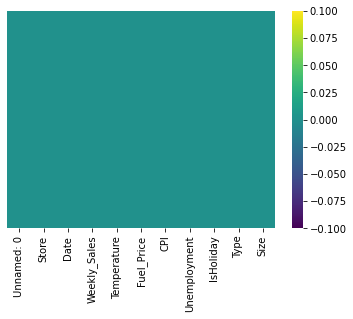

In [15]:
sns.heatmap(walmart.isnull(),yticklabels=False, cmap="viridis")

# 2.REMOVING DUPLICATED

In [16]:
Dup_Rows = walmart[walmart.duplicated()]
print("Duplicate Rows : \n {}".format(Dup_Rows))
#no duplicates

Duplicate Rows : 
 Empty DataFrame
Columns: [Unnamed: 0, Store, Date, Weekly_Sales, Temperature, Fuel_Price, CPI, Unemployment, IsHoliday, Type, Size]
Index: []


# 3.OUTLIER TREATMENT 

In [17]:
numeric_col = ['Store' , 'Weekly_Sales', 'Temperature','Fuel_Price','CPI','Unemployment','Size']

<AxesSubplot:>

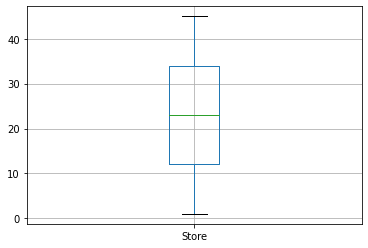

In [18]:
walmart.boxplot('Store')

<AxesSubplot:>

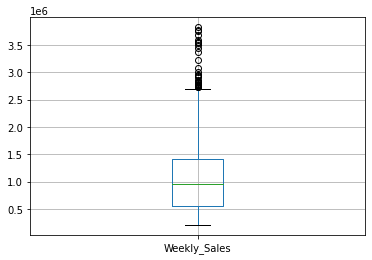

In [19]:
walmart.boxplot('Weekly_Sales')

In [20]:
for x in ['Weekly_Sales']:
    q75,q25 = np.percentile(walmart.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    walmart.loc[walmart[x] < min,x] = np.nan
    walmart.loc[walmart[x] > max,x] = np.nan

<AxesSubplot:>

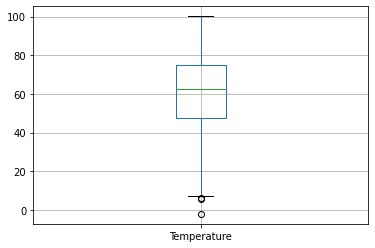

In [21]:
walmart.boxplot('Temperature')

In [22]:
for x in ['Temperature']:
    q75,q25 = np.percentile(walmart.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    walmart.loc[walmart[x] < min,x] = np.nan
    walmart.loc[walmart[x] > max,x] = np.nan

<AxesSubplot:>

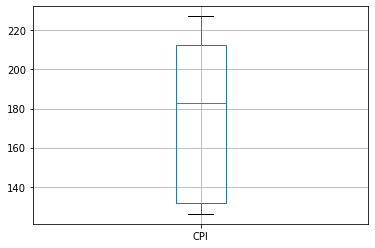

In [23]:
walmart.boxplot('CPI')

<AxesSubplot:>

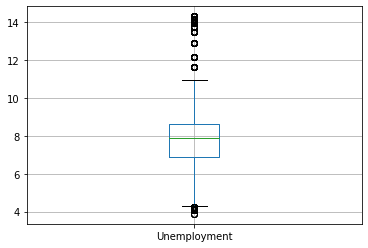

In [24]:
walmart.boxplot('Unemployment')

In [25]:
for x in ['Unemployment']:
    q75,q25 = np.percentile(walmart.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    walmart.loc[walmart[x] < min,x] = np.nan
    walmart.loc[walmart[x] > max,x] = np.nan

<AxesSubplot:>

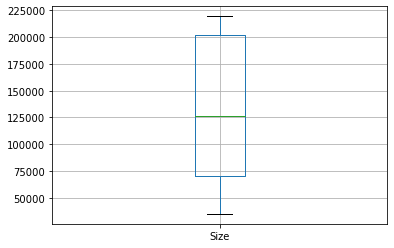

In [26]:
walmart.boxplot('Size')

<AxesSubplot:>

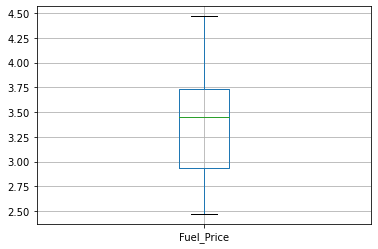

In [27]:
walmart.boxplot('Fuel_Price')

In [28]:
walmart.isnull().sum()

Unnamed: 0        0
Store             0
Date              0
Weekly_Sales     34
Temperature       3
Fuel_Price        0
CPI               0
Unemployment    481
IsHoliday         0
Type              0
Size              0
dtype: int64

In [29]:
walmart = walmart.dropna(axis = 0)

In [30]:
walmart.isnull().sum()

Unnamed: 0      0
Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [31]:
walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart['Year'] = pd.to_datetime(walmart['Date']).dt.year
walmart['Month'] = pd.to_datetime(walmart['Date']).dt.month
walmart['Week'] = pd.to_datetime(walmart['Date']).dt.week
walmart['Day'] = pd.to_datetime(walmart['Date']).dt.day
walmart.replace({'A': 1, 'B': 2,'C':3},inplace=True)

C:\Users\91936\AppData\Local\Temp/ipykernel_252/1475962930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart['Date'] = pd.to_datetime(walmart['Date'])
C:\Users\91936\AppData\Local\Temp/ipykernel_252/1475962930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart['Year'] = pd.to_datetime(walmart['Date']).dt.year
C:\Users\91936\AppData\Local\Temp/ipykernel_252/1475962930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

# Variate analysis¶

# <b> Univariate analysis</b>

<b>Getting the statistical inference of the dataset</b>

In [32]:
walmart.describe()

,Unnamed: 0,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,Day
count,5917.000000,5917.000000,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,3188.253000,22.801251,1.039146e+06,60.390551,3.340717,175.023148,7.722305,1.628359,130354.719790,2010.959101,6.464594,25.947440,15.626331
std,1872.793654,13.094060,5.510626e+05,18.365897,0.458088,39.023139,1.243337,0.693562,63055.312891,0.795111,3.306923,14.444004,8.749431
min,0.000000,1.000000,2.099862e+05,7.460000,2.472000,126.064000,4.308000,1.000000,34875.000000,2010.000000,1.000000,1.000000,1.000000
25%,1511.000000,11.000000,5.529853e+05,47.100000,2.891000,132.767067,6.891000,1.000000,70713.000000,2010.000000,4.000000,14.000000,8.000000
50%,3134.000000,22.000000,9.489650e+05,62.530000,3.420000,190.006988,7.852000,2.000000,126512.000000,2011.000000,6.000000,26.000000,16.000000
75%,4786.000000,34.000000,1.426405e+06,74.690000,3.721000,213.799099,8.494000,2.000000,202307.000000,2012.000000,9.000000,38.000000,23.000000
max,6434.000000,45.000000,2.685352e+06,100.140000,4.468000,227.232807,10.926000,3.000000,219622.000000,2012.000000,12.000000,52.000000,31.000000


<b>1. Counting no of Holidays </b>

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


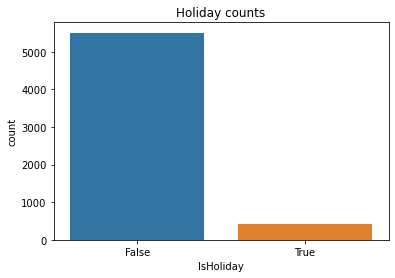

In [33]:
sns.countplot(walmart['IsHoliday'])
plt.title('Holiday counts')
plt.show()

<b> Inference :</b> No of holidays is very less compared to working days.

<b> 2. Visualizing the types of stores </b>

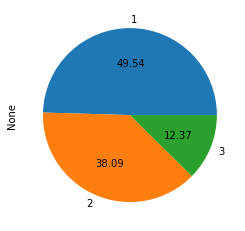

In [34]:
walmart.groupby('Type').size().plot(kind='pie',autopct='%.2f')
plt.show()

<b> Inference :</b> Store A has more percentage of stores compared to B and C stores, Where Store C has least percent

<b> 3. Visualizing the spread of Fuel price sales </b>

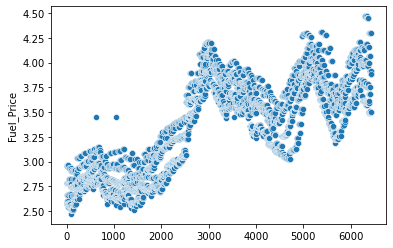

In [35]:
sns.scatterplot(x=walmart.index,y=walmart['Fuel_Price'])
plt.show()

<b>Inference: </b>  there is high price difference in fuel price when compared to starting years 

<b> 4. Visualizing the spread of temperature </b>

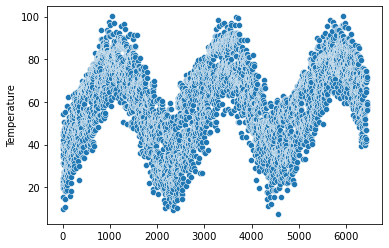

In [36]:
sns.scatterplot(x=walmart.index,y=walmart['Temperature'])
plt.show()

<b>Inference: </b> we can see that the temperature increases and decreases alternatively

# Bi-Variate Analysis

<b>Average weekly sales in year - 2010 </b>

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


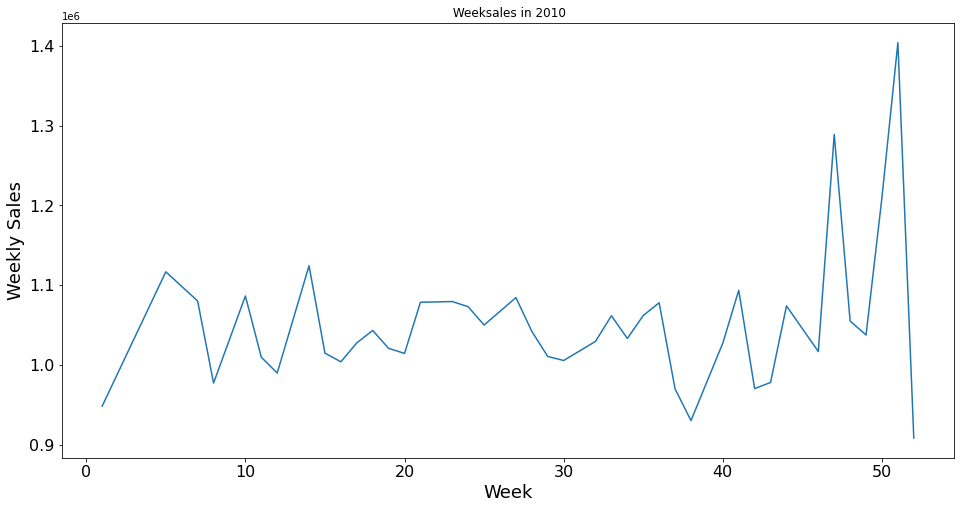

In [37]:
plt.figure(figsize=(16,8))
weekly_sales_2010 = walmart[walmart['Year']==2010]['Weekly_Sales'].groupby(walmart['Week']).mean()

sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values) # for plotting then lineplot
plt.title(" Weeksales in 2010")
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=18)
plt.show()

<b>Inference: </b> Weekly sales during 2010 seems to have a  sharp dip between 35-40 th weeks and sharp rise during 50th week.

<b>Average weekly sales in year - 2011 </b>

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


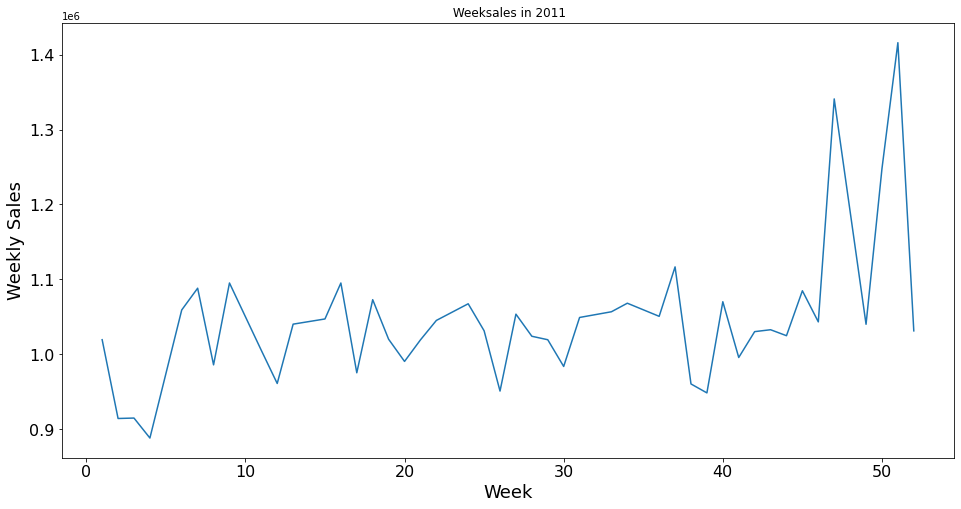

In [38]:
plt.figure(figsize=(16,8))
weekly_sales_2011 = walmart[walmart['Year']==2011]['Weekly_Sales'].groupby(walmart['Week']).mean()

sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values) # for plotting then lineplot
plt.title(" Weeksales in 2011")
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=18)
plt.show()

<b>Inference: </b> Weekly sales during 2011 seems to keep on changing during a certain interval and has a high during the year ends.

<b>Average weekly sales in year - 2012 </b>

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


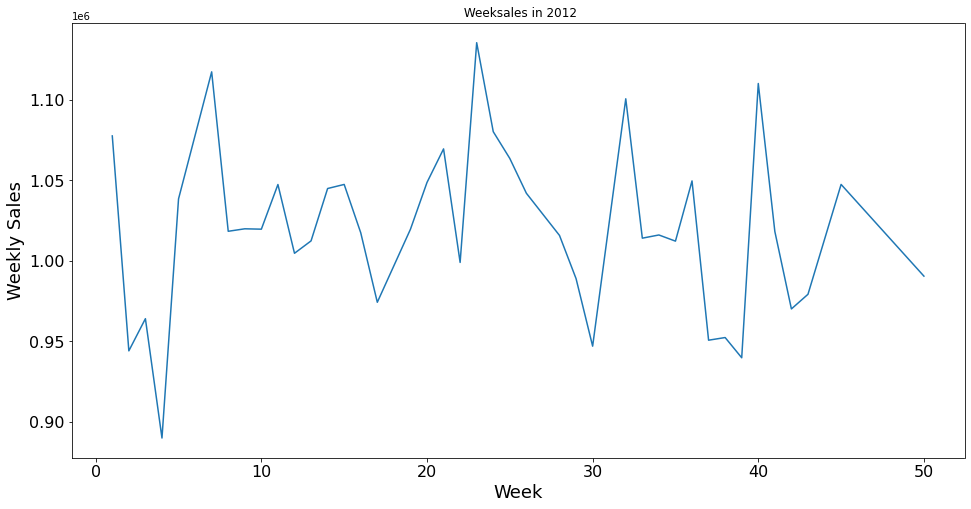

In [39]:
plt.figure(figsize=(16,8))
weekly_sales_2012 = walmart[walmart['Year']==2012]['Weekly_Sales'].groupby(walmart['Week']).mean()
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values) # for plotting then lineplot
plt.title(" Weeksales in 2012")
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=18)
plt.show()

<b>Inference: </b> Weekly sales during 2012 has its lowest mark during the starting weeks and attains the peak during the mid of the year.

<b>Weekly sales vs fuel price</b>

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


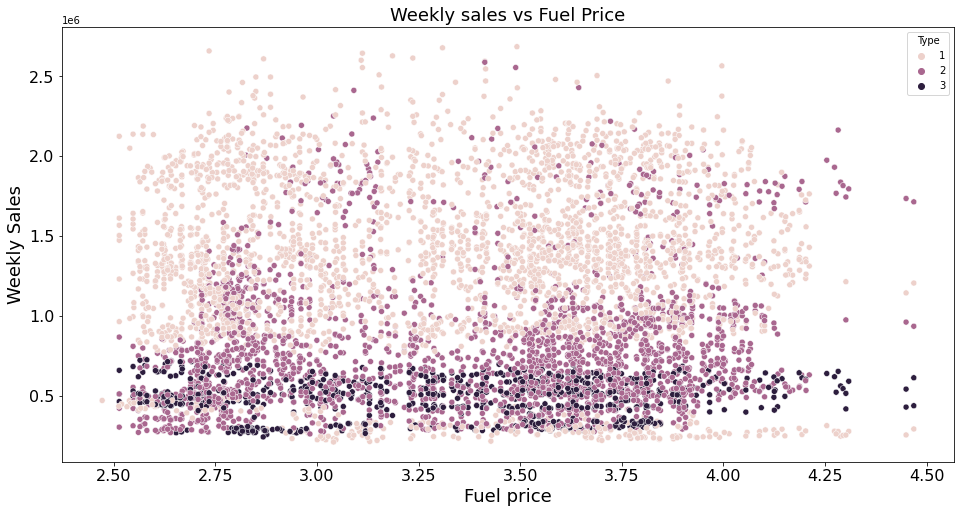

In [40]:
plt.figure(figsize=(16,8))
sns.scatterplot(walmart['Fuel_Price'], walmart['Weekly_Sales'],hue=walmart.Type)
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.title('Weekly sales vs Fuel Price',fontsize=18)
plt.xlabel('Fuel price', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=18)
plt.show()

<b>Inference: </b> Between fuel price and the sales there doesn't seem to exist any clear relationship.

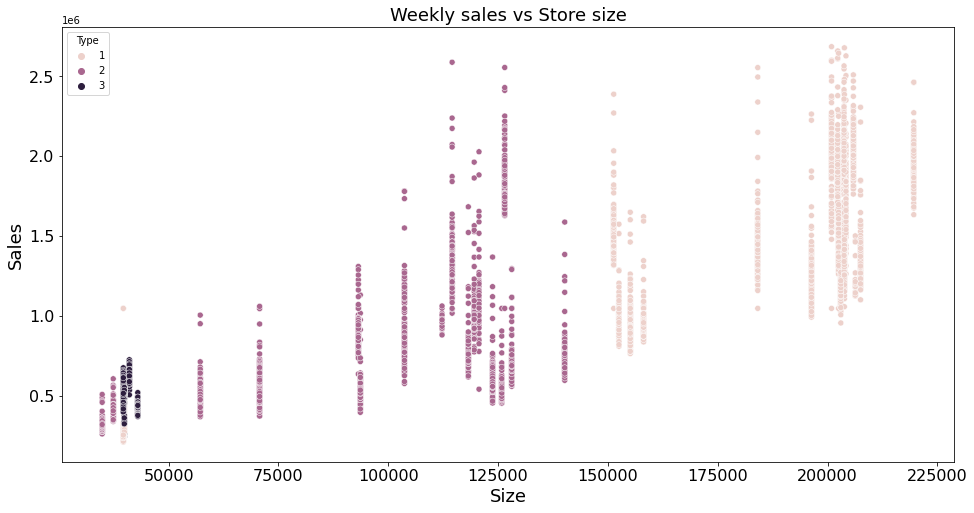

In [41]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=walmart.Size, y=walmart.Weekly_Sales, hue=walmart.Type);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.title('Weekly sales vs Store size',fontsize=18)
plt.xlabel('Size', fontsize=18)
plt.ylabel('Sales', fontsize=18);

<b>Inference: </b>The sales generally increases with increase of size of store.

<b> Average Sales per Store</b>

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


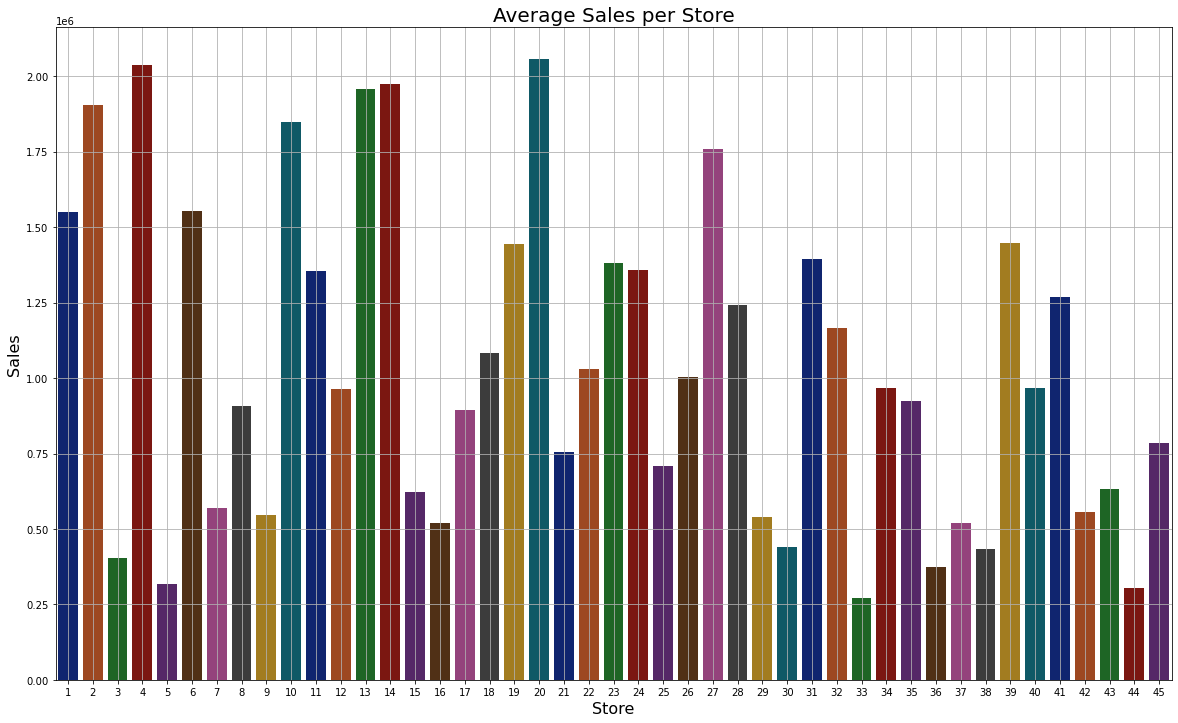

In [42]:
weekly_sales = walmart['Weekly_Sales'].groupby(walmart['Store']).mean()
plt.figure(figsize=(20,12))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

<b>Inference: </b>The store no 20 has the highest sales and store 33 has the least sales

# Multivariate Analysis

<b> Average Weekly Sales per Year</b>

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


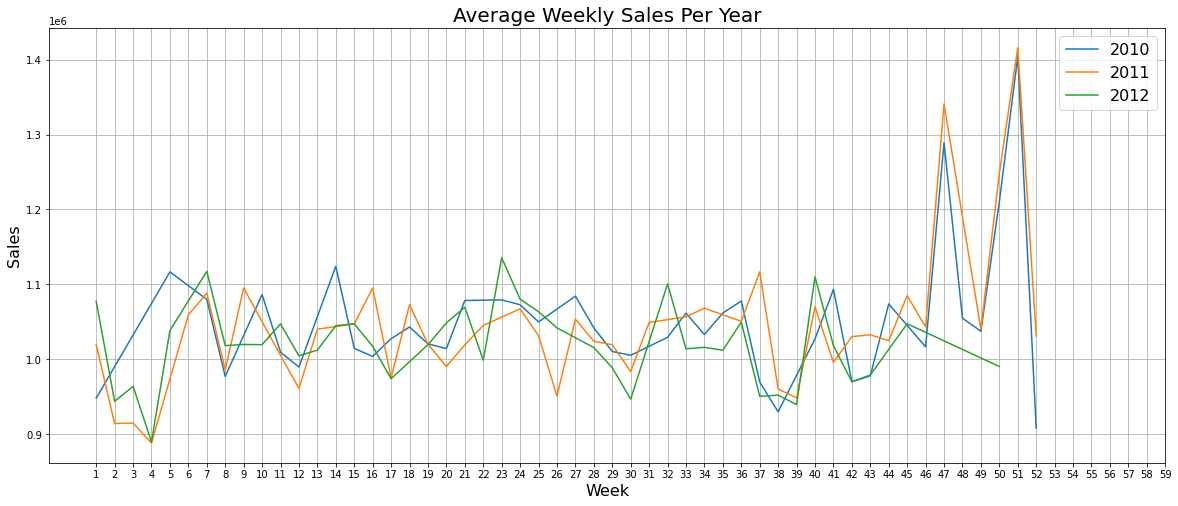

In [43]:
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

<b>Inference:</b> Almost Every year the sales increase during the last weeks

<b>Weekly Sales by Store Number and Holiday</b>

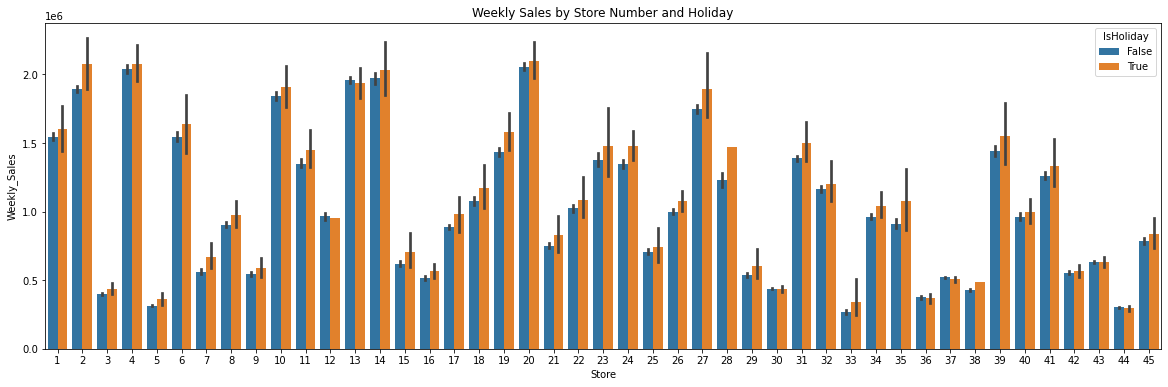

In [44]:
sales= pd.concat([walmart['Store'], walmart['Weekly_Sales'], walmart['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Weekly Sales by Store Number and Holiday')
fig = sns.barplot(x='Store', y='Weekly_Sales', data=sales,  hue='IsHoliday')

<b>Inference: </b>
From the plot we can see that weekly sales of all store on holiday is higher as compared to non holiday week.

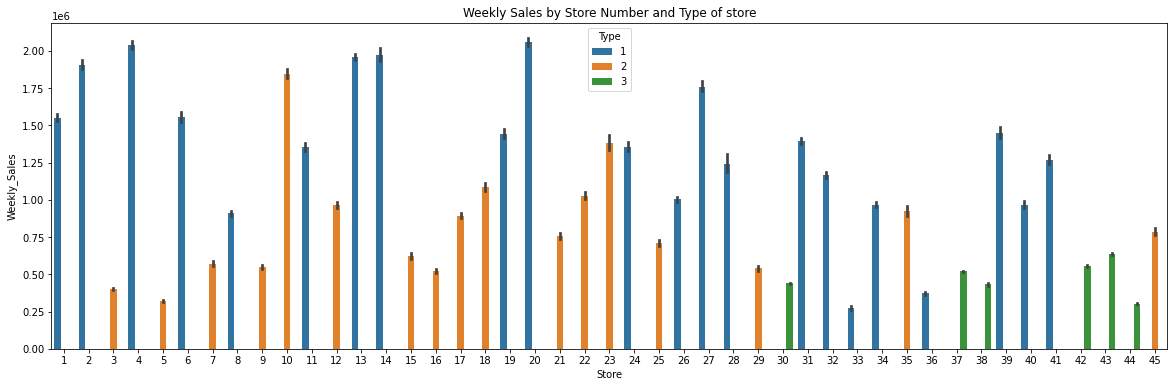

In [45]:
sales= pd.concat([walmart['Store'], walmart['Weekly_Sales'], walmart['Type']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Weekly Sales by Store Number and Type of store')
fig = sns.barplot(x='Store', y='Weekly_Sales', data=sales,  hue='Type')

<b>Inference: </b> From the plot we can infer that Type-1 Stores have high weekly sales.

<b> Weekly Sales - year wise</b>

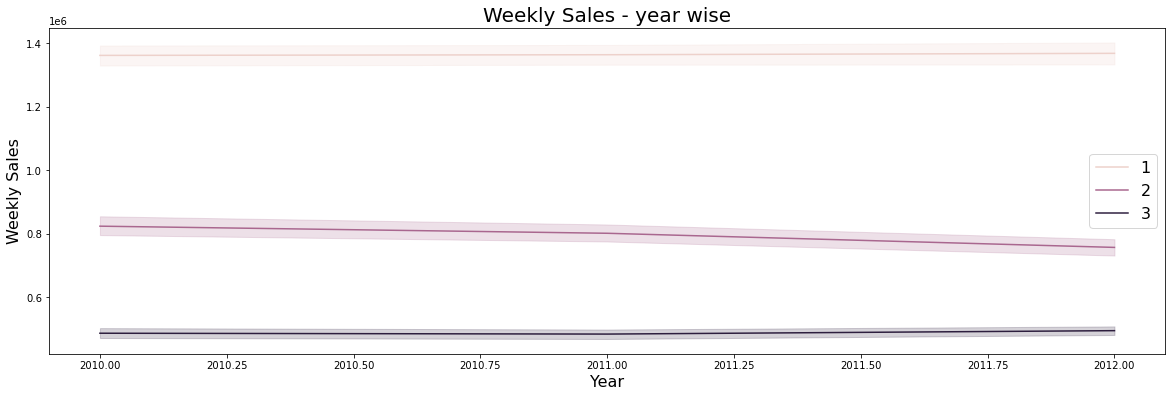

In [46]:
plt.figure(figsize=(20,6))
sns.lineplot(x="Year",y="Weekly_Sales",data=walmart,hue='Type')
plt.legend(['1','2','3'], loc='best', fontsize=16)
plt.title('Weekly Sales - year wise', fontsize=20)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

<b>Inference: </b> Across the year almost type 1 and 3 stores has a stable weekly sales, but type 2 store seems to get drop in sales since 2011.

<b> Weekly Sales - Month wise</b>

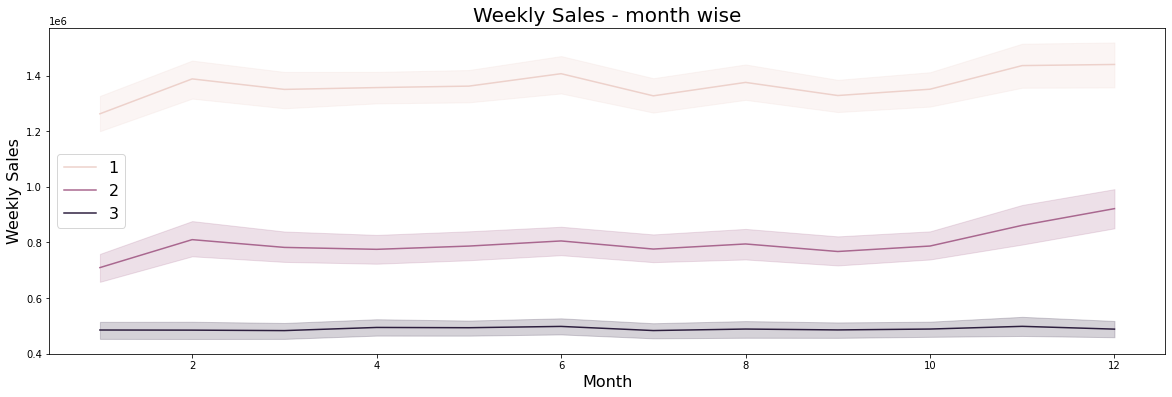

In [47]:
plt.figure(figsize=(20,6))
sns.lineplot(x="Month",y="Weekly_Sales",data=walmart,hue='Type')
plt.legend(['1','2','3'], loc='best', fontsize=16)
plt.title('Weekly Sales - month wise', fontsize=20)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.show()

<b>Inference: </b> As per months, type 1 and 2 stores gets high sales during the year endings and type 3 store remains almost stable

# 4 . NORMALIZING AND SCALING NUMERICAL VARIABLES

In [48]:
from sklearn import preprocessing

In [49]:
#range (0,1)
data=walmart.drop(['Date','Type','IsHoliday','Unnamed: 0','Year','Month','Week','Day'],axis=1)
names=['Store', 'Weekly_Sales', 'Temperature','Fuel_Price','CPI','Unemployment','Size']
d = preprocessing.normalize(data,axis=0)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,0.000494,0.018167,0.008714,0.009916,0.015304,0.013473,0.013585
1,0.004944,0.024239,0.011192,0.011420,0.009167,0.016230,0.011358
2,0.018294,0.005924,0.009468,0.009916,0.015214,0.014217,0.003583
3,0.008405,0.008721,0.004760,0.010278,0.009167,0.010883,0.008366
4,0.014833,0.005141,0.008043,0.009916,0.015279,0.013835,0.003859


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

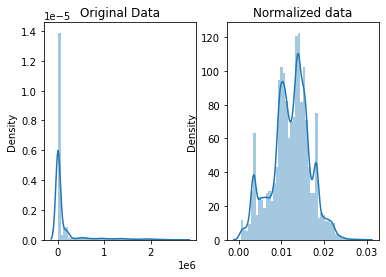

In [50]:
fig, ax=plt.subplots(1,2)
sns.distplot(data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(d, ax=ax[1])
ax[1].set_title("Normalized data")

In [51]:
#scaling to range 0,5

In [52]:
#by setting range (0,5)
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler(feature_range=(0, 5))
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
0,0.000000,2.895945,1.880125,0.250501,4.202499,2.869447,3.151337
1,1.022727,4.005595,2.529132,1.227455,0.018685,4.122847,2.480067
2,4.090909,0.658530,2.077579,0.250501,4.141047,3.207918,0.136267
3,1.818182,1.169625,0.844303,0.485972,0.018685,1.692354,1.578185
4,3.295455,0.515322,1.704251,0.250501,4.185510,3.034149,0.219571


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized and scaled data')

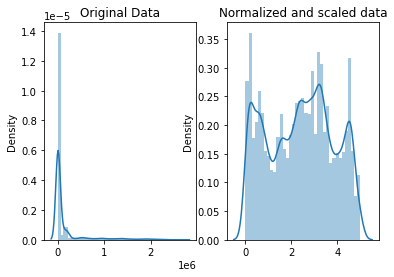

In [53]:
fig, ax=plt.subplots(1,2)
sns.distplot(data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(d, ax=ax[1])
ax[1].set_title("Normalized and scaled data")

# 5. ENCODING CATEGORICAL VARIABLES

In [54]:
walmart['Holiday']=[int(i) for i in list(walmart.IsHoliday)]
walmart.head(10)
#holiday - false :0 , true : 1

C:\Users\91936\AppData\Local\Temp/ipykernel_252/1008845829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walmart['Holiday']=[int(i) for i in list(walmart.IsHoliday)]


,Unnamed: 0,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Year,Month,Week,Day,Holiday
0,0,1,2010-05-02,1643690.90,42.31,2.572,211.096358,8.106,False,1,151315,2010,5,17,2,0
1,1287,10,2010-05-02,2193048.75,54.34,2.962,126.442065,9.765,False,2,126512,2010,5,17,2,0
2,5148,37,2010-05-02,536006.73,45.97,2.572,209.852966,8.554,False,3,39910,2010,5,17,2,0
3,2288,17,2010-05-02,789036.02,23.11,2.666,126.442065,6.548,False,2,93188,2010,5,17,2,0
4,4147,30,2010-05-02,465108.52,39.05,2.572,210.752605,8.324,False,3,42988,2010,5,17,2,0
5,3432,25,2010-05-02,677231.63,21.10,2.784,204.247194,8.187,False,2,128107,2010,5,17,2,0
6,3003,22,2010-05-02,1033017.37,24.36,2.788,135.352461,8.283,False,2,119557,2010,5,17,2,0
7,3146,23,2010-05-02,1364721.58,15.25,2.788,131.527903,5.892,False,2,114533,2010,5,17,2,0
8,3289,24,2010-05-02,1388725.63,22.43,2.954,131.527903,8.326,False,1,203819,2010,5,17,2,0
9,2574,19,2010-05-02,1507637.17,20.96,2.954,131.527903,8.350,False,1,203819,2010,5,17,2,0


In [55]:
Type_dummy=pd.get_dummies(walmart['Type'])
Type_dummy.head(10)

,1,2,3
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,1,0,0
9,1,0,0


In [56]:
walmart=pd.concat([walmart,Type_dummy],axis=1)
walmart.head(10)

,Unnamed: 0,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Year,Month,Week,Day,Holiday,1,2,3
0,0,1,2010-05-02,1643690.90,42.31,2.572,211.096358,8.106,False,1,151315,2010,5,17,2,0,1,0,0
1,1287,10,2010-05-02,2193048.75,54.34,2.962,126.442065,9.765,False,2,126512,2010,5,17,2,0,0,1,0
2,5148,37,2010-05-02,536006.73,45.97,2.572,209.852966,8.554,False,3,39910,2010,5,17,2,0,0,0,1
3,2288,17,2010-05-02,789036.02,23.11,2.666,126.442065,6.548,False,2,93188,2010,5,17,2,0,0,1,0
4,4147,30,2010-05-02,465108.52,39.05,2.572,210.752605,8.324,False,3,42988,2010,5,17,2,0,0,0,1
5,3432,25,2010-05-02,677231.63,21.10,2.784,204.247194,8.187,False,2,128107,2010,5,17,2,0,0,1,0
6,3003,22,2010-05-02,1033017.37,24.36,2.788,135.352461,8.283,False,2,119557,2010,5,17,2,0,0,1,0
7,3146,23,2010-05-02,1364721.58,15.25,2.788,131.527903,5.892,False,2,114533,2010,5,17,2,0,0,1,0
8,3289,24,2010-05-02,1388725.63,22.43,2.954,131.527903,8.326,False,1,203819,2010,5,17,2,0,1,0,0
9,2574,19,2010-05-02,1507637.17,20.96,2.954,131.527903,8.350,False,1,203819,2010,5,17,2,0,1,0,0


In [57]:
walmart=walmart.drop(['IsHoliday','Type'],axis=1)
walmart.drop(10)
#now everything is numerical except TYPE

,Unnamed: 0,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Day,Holiday,1,2,3
0,0,1,2010-05-02,1643690.90,42.31,2.572,211.096358,8.106,151315,2010,5,17,2,0,1,0,0
1,1287,10,2010-05-02,2193048.75,54.34,2.962,126.442065,9.765,126512,2010,5,17,2,0,0,1,0
2,5148,37,2010-05-02,536006.73,45.97,2.572,209.852966,8.554,39910,2010,5,17,2,0,0,0,1
3,2288,17,2010-05-02,789036.02,23.11,2.666,126.442065,6.548,93188,2010,5,17,2,0,0,1,0
4,4147,30,2010-05-02,465108.52,39.05,2.572,210.752605,8.324,42988,2010,5,17,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,2859,20,2012-10-26,2031650.55,60.04,3.882,216.151590,7.293,203742,2012,10,43,26,0,1,0,0
6430,3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,128107,2012,10,43,26,0,0,1,0
6431,714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,34875,2012,10,43,26,0,0,1,0
6433,2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,120653,2012,10,43,26,0,0,1,0


# ML Algorithm

Splitting the train and test data.
Applying linear regression.
Predicting the value
Evaluate the model

1. Splitting data into train and test data. The size of the test data is 30%.

In [58]:
#splitting data in input and output
X=walmart.drop(['Weekly_Sales','Store','Date','Unnamed: 0'],axis=1)
y=walmart['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [59]:
X

,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Day,Holiday,1,2,3
0,42.31,2.572,211.096358,8.106,151315,2010,5,17,2,0,1,0,0
1,54.34,2.962,126.442065,9.765,126512,2010,5,17,2,0,0,1,0
2,45.97,2.572,209.852966,8.554,39910,2010,5,17,2,0,0,0,1
3,23.11,2.666,126.442065,6.548,93188,2010,5,17,2,0,0,1,0
4,39.05,2.572,210.752605,8.324,42988,2010,5,17,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,60.04,3.882,216.151590,7.293,203742,2012,10,43,26,0,1,0,0
6430,56.69,3.882,216.151590,7.293,128107,2012,10,43,26,0,0,1,0
6431,71.70,3.506,224.037814,5.422,34875,2012,10,43,26,0,0,1,0
6433,56.09,3.917,138.728161,8.243,120653,2012,10,43,26,0,0,1,0


2. Applying linear regression and fit the training data into it.

In [60]:
LR=LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(normalize=True)

3. Predicting the data for test value as per linear regression.

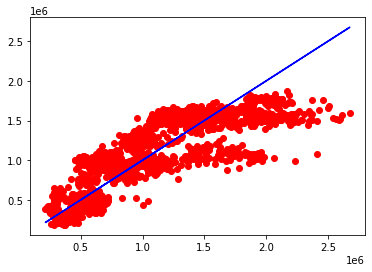

In [61]:
y_pred=LR.predict(X_test)
plt.plot(y_test,y_pred,'ro')
plt.plot(y_test,y_test,'b-')
plt.show()

4. Evaluating the model by calculating errors by the root mean square error and R -squared.

In [63]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.6879852853562488


Now, if we want to predict the weekly sales. Then we give particular tuple to input in the model and predict the weekly sales as output. Here I’m showing an example of that.

In [66]:
prediction=LR.predict(pd.DataFrame([(23.11,2.666,126.442065,6.548,93188,2010,5,17,2,0,0,1,0)]))
print(prediction)

[783880.39121796]


ML ALGORITHM 3 : decision tree

In [70]:
walmart

,Unnamed: 0,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Day,Holiday,1,2,3
0,0,1,2010-05-02,1643690.90,42.31,2.572,211.096358,8.106,151315,2010,5,17,2,0,1,0,0
1,1287,10,2010-05-02,2193048.75,54.34,2.962,126.442065,9.765,126512,2010,5,17,2,0,0,1,0
2,5148,37,2010-05-02,536006.73,45.97,2.572,209.852966,8.554,39910,2010,5,17,2,0,0,0,1
3,2288,17,2010-05-02,789036.02,23.11,2.666,126.442065,6.548,93188,2010,5,17,2,0,0,1,0
4,4147,30,2010-05-02,465108.52,39.05,2.572,210.752605,8.324,42988,2010,5,17,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,2859,20,2012-10-26,2031650.55,60.04,3.882,216.151590,7.293,203742,2012,10,43,26,0,1,0,0
6430,3574,25,2012-10-26,688940.94,56.69,3.882,216.151590,7.293,128107,2012,10,43,26,0,0,1,0
6431,714,5,2012-10-26,319550.77,71.70,3.506,224.037814,5.422,34875,2012,10,43,26,0,0,1,0
6433,2573,18,2012-10-26,1127516.25,56.09,3.917,138.728161,8.243,120653,2012,10,43,26,0,0,1,0


In [71]:
X = walmart[['Temperature','Fuel_Price','CPI','Unemployment','Size','Holiday',1,2,3]].copy()
y = walmart['Weekly_Sales'].copy()

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train.head()
y_train.head()

936      585548.79
3043    1725268.56
1953    1200892.56
4287     472511.32
4245    1219263.40
Name: Weekly_Sales, dtype: float64

In [73]:
X_train.shape

(4141, 9)

In [74]:
from sklearn.tree import DecisionTreeRegressor
Dtree=DecisionTreeRegressor(min_samples_leaf=0.01)
Dtree.fit(X_train,y_train)
y_predict=Dtree.predict(X_test)
print(y_predict)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

[1146708.02987342  404777.89146531 1022537.86825    ... 1785796.95366667
 1304658.32450704 2032613.88278756]


0.9295736719914408

In [ ]:
# DECISION TREE has higher accuracy compared to LINEAR REGRESSION 